<a href="https://colab.research.google.com/github/leonlinsx/ABP-code/blob/master/Statistical_calcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bonferroni Correction Explanation for peeking cases

The Bonferroni correction is a statistical method used to address the issue of multiple comparisons in hypothesis testing. When conducting multiple tests simultaneously, the probability of observing at least one false positive (Type I error) increases. The Bonferroni correction offers a straightforward way to control this family-wise error rate.

- **Principle:** To maintain an overall significance level (alpha) across all tests, the significance level for each individual test is adjusted. The adjustment involves dividing the original alpha by the number of tests conducted.

Reference: https://pubmed.ncbi.nlm.nih.gov/24697967/

**Common Mistakes in Using Bonferroni Correction**

1. **Overly Conservative:** The Bonferroni correction is conservative, meaning it can be excessively strict. This conservativeness can make it challenging to detect true effects, particularly for tests with large effect sizes.

2. **Assuming Independence:** The correction assumes that the tests are independent. If this assumption is not met, the correction can either be too conservative or fail to adequately control the family-wise error rate.

3. **Ignoring Effect Size:** Bonferroni correction treats all tests equally, regardless of the effect size. This can lead to unnecessarily strict criteria for tests with substantial effects.

4. **Cumulative Error Rate:** Researchers should be aware that the cumulative probability of making at least one Type I error across all tests can exceed the desired overall alpha level.

5. **Alternative Methods:** Depending on the context and research goals, alternative methods such as False Discovery Rate (FDR) control may be more appropriate for controlling the family-wise error rate. These methods are less conservative and may provide more power to detect true effects.

In [1]:
# Bonferroni math

# User-defined variables
num_peeking_cases = 5  # Adjust the number of peeking cases here
original_alpha = 0.05  # Adjust the original alpha level here

def bonferroni_correction(num_tests, alpha_original):
    # Calculate the adjusted alpha
    alpha_adjusted = alpha_original / num_tests
    return alpha_adjusted

# Calculate the Bonferroni-corrected alpha
adjusted_alpha = bonferroni_correction(num_peeking_cases, original_alpha)

# Display the adjusted alpha
print(f"Adjusted Alpha for {num_peeking_cases} peeking cases: {adjusted_alpha}")

Adjusted Alpha for 5 peeking cases: 0.01


# Bonferroni math

# User-defined variables
num_peeking_cases = 5  # Adjust the number of peeking cases here
original_alpha = 0.05  # Adjust the original alpha level here

def bonferroni_correction(num_tests, alpha_original):
    # Calculate the adjusted alpha
    alpha_adjusted = alpha_original / num_tests
    return alpha_adjusted

# Calculate the Bonferroni-corrected alpha
adjusted_alpha = bonferroni_correction(num_peeking_cases, original_alpha)

# Display the adjusted alpha
print(f"Adjusted Alpha for {num_peeking_cases} peeking cases: {adjusted_alpha}")

# The t-Statistic Formula and Equal Variance Assumption

The t-statistic formula is a fundamental tool in hypothesis testing, used to assess whether the means of two groups are significantly different from each other. In the context of a two-sample t-test with the assumption of equal variances, the formula takes the following form:

## Original Formula

t = (x̄₁ - x̄₂) / (sₚ * √(1/n₁ + 1/n₂))

Here's a detailed breakdown of the components:

- 't': This represents the t-statistic, a measure of the difference between the sample means.
- x̄₁ and x̄₂: These are the sample means of the two groups being compared.
- sₚ: The pooled standard deviation is a critical factor and is calculated using the following formula:

sₚ = √(((n₁ - 1) * s₁² + (n₂ - 1) * s₂²) / (n₁ + n₂ - 2))

- n₁ and n₂: These are the respective sample sizes of the two groups.
- s₁ and s₂: These represent the sample standard deviations of the two groups.

## Assumption of Equal Variance

Under the assumption that the variances of the two groups (population variances) are equal, denoted as σ₁² = σ₂² = σ², we can simplify the calculation of the pooled standard deviation sₚ as follows:

The pooled standard deviation sₚ becomes:

sₚ = √(((n₁ - 1) * σ₁² + (n₂ - 1) * σ₂²) / (n₁ + n₂ - 2))

   (Due to the assumption of equal variances)

sₚ = √(σ² * (n₁ - 1 + n₂ - 1) / (n₁ + n₂ - 2))

sₚ = √(σ² * (n₁ + n₂ - 2) / (n₁ + n₂ - 2))

sₚ = σ

Under the assumption of equal variance, the pooled standard deviation sₚ simplifies to the common population standard deviation σ.

## Simplified Formula with equal variance

With that assumption of equal variance, the t-statistic formula simplifies to:

t = (x̄₁ - x̄₂) / (σ * √(1/n₁ + 1/n₂))

In summary, under the assumption of equal variance, the pooled standard deviation sₚ simplifies to the common population standard deviation σ, and the t-statistic formula becomes the simplified form shown above. This simplified formula is employed when there is reason to believe that the population variances of the two groups are approximately equal, leading to what is known as a "pooled" analysis.

## Additional Simplification by representing the proportion of users in treatment group

To delve even deeper into the formula, you can express the denominator in terms of the standard deviation (σ), the total number of users (n), and the proportion of users in treatment (p). This alternative representation highlights the relationship between the treatment percentage (p) and the standard deviation in hypothesis testing.

Starting from the t-statistic formula:

t = (x̄₁ - x̄₂) / (σ * √(1/n₁ + 1/n₂))

1. Express the denominator in terms of standard deviation (σ), total users (n), and the proportion of users in treatment (p):

√(1/n₁ + 1/n₂) = √((n₂ + n₁) / (n₁ * n₂))

2. Substitute the total number of users n for n₁ + n₂:

√(n / (n₁ * n₂))

3. Introduce p as the proportion of users allocated to the treatment group and (1 - p) as the proportion allocated to the control group. Thus, n₁ becomes n * (1 - p), and n₂ becomes n * p:

√(n / (n * (1 - p) * n * p))

4. Simplify the expression by canceling one 'n' in the numerator and denominator:

√(1 / ((1 - p) * p * n))

This results in the t-statistic formula with the denominator expressed in terms of the standard deviation, total users (n), and the proportion of users in treatment (p):

t = (x̄₁ - x̄₂) / (σ * 1/√((1 - p) * p * n))

## Maximising the t statistic

All else constant, changing the proportion of users in treatment affects the t statistic only through the (1 - p) * p term in the denominator. The larger this term is, the smaller the denominator will be, given the reciprocal of (1 - p) * p is being used. The smaller the denominator, the larger the t statistic, and the smaller the p-value.

Hence, we want to maximise the (1 - p) * p term, to minimise the denominator, and maximise the t statistic.

To prove that the expression "(1 - p) * p" maximizes when "p" equals 0.5, we can follow these steps:

1. Start with the expression:

```
p(1 - p)
```

2. Find the derivative of the expression "p(1 - p)" with respect to "p":

```
f'(p) = 1 - 2p
```

3. Set the derivative "f'(p)" equal to zero and solve for "p":

```
1 - 2p = 0
2p = 1
p = 1/2
```

4. We've found that the derivative is zero at "p = 0.5". To determine if this is a maximum or minimum, we can take the second derivative:

```
f''(p) = -2
```

5. Since "f''(p)" is a constant (-2) and it's less than zero, we can conclude that "f(p)" has a maximum at "p = 0.5".

Therefore, the expression "p(1 - p)" is maximized when "p" equals 0.5. This result is often used in statistics to maximize the variance for a binary random variable when you have equal probabilities of success and failure. In other words, a balanced 50% / 50% split will maximise

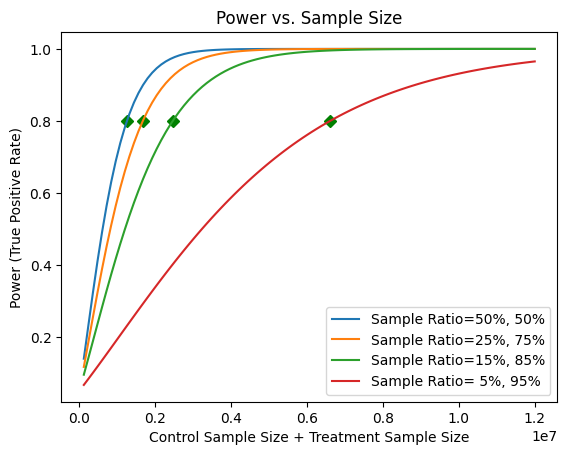

In [3]:
"""
Using the above proof, we plot power curves at various sample and treatment sizes, to show that a balanced split will get us to statistical significance the quickest
Based on this post: https://towardsdatascience.com/even-split-increases-power-of-a-b-tests-7cc2b8cb182a
"""

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from statsmodels.stats.power import tt_ind_solve_power

def test_ttest_power_diff(
    file_path,
    mean_diff,
    std,
    sample_size_total=None,
    alpha=0.05,
    desired_power=0.8,
    ratios=[1, 0.5],
):
    """
    Calculates power functions for different bucket ratios with the same mean diff and std.
    :param file_path: file path to save the plot
    :param mean_diff: the mean difference between control and treatment buckets
    :param std: standard deviation
    :param sample_size_total: sample size of control + sample size of treatment
    :param alpha: alpha indicates the desired type I error rate
    :param desired_power: the desired power. Need this value to mark on the graph
    :param ratios: a list of bucket ratios to compare
    :return: None
    """
    fig, _ = plt.subplots()

    for ratio in ratios:
        effect_size = mean_diff / std
        sizes = np.append(
            np.arange(
                round(sample_size_total / 100),
                sample_size_total,
                round(sample_size_total / 100),
            ),
            sample_size_total,
        )
        powers = []

        for sample_size_total in sizes:
            sample1_size = sample_size_total / (1 + ratio)
            assert sample1_size + sample1_size * ratio == sample_size_total
            power = tt_ind_solve_power(
                effect_size=effect_size, nobs1=sample1_size,
                alpha=alpha, ratio=ratio,
            )
            powers.append(power)

        try:  # mark the desired power on the graph
            z1 = interp1d(powers, sizes)
            results = z1(desired_power)
            plt.plot([results], [desired_power], "gD")
        except Exception as e:
            print("Error: ", e)

        plt.title("Power vs. Sample Size")
        plt.xlabel("Control Sample Size + Treatment Sample Size")
        plt.ylabel("Power (True Positive Rate)")

        plt.plot(
            sizes,
            powers,
            label="Sample Ratio={:2.0f}%, {:2.0f}%".format(
                round((1 - 1 / (ratio + 1)) * 100),
                round(1 / (ratio + 1) * 100)
            ),
        )

    plt.legend()
    fig.savefig(file_path)

test_ttest_power_diff(
    "<file_path>",
    mean_diff=0.05,
    std=10.0,
    sample_size_total=1.2e7,
    ratios=[1, 25 / 75, 15 / 85, 5 / 95],
)
